In [1]:
import pandas as pd
data={'Name':['Alice','Bob','Charlie','Dave','Eve'],'Age':[25,32,None,41,28],'Salary':[50000,None,70000,90000,60000]}
df=pd.DataFrame(data)
df

,Name,Age,Salary
0,Alice,25.0,50000.0
1,Bob,32.0,NaN
2,Charlie,NaN,70000.0
3,Dave,41.0,90000.0
4,Eve,28.0,60000.0


In [ ]:
#remove the missing value in the salary with the particular row


In [2]:
df_clean=df.dropna(subset=['Salary'])
df_clean

,Name,Age,Salary
0,Alice,25.0,50000.0
2,Charlie,NaN,70000.0
3,Dave,41.0,90000.0
4,Eve,28.0,60000.0


In [3]:
#the row with complete missing value then the row get deleted
df_clean_all=df.dropna(how='all')
df_clean_all

,Name,Age,Salary
0,Alice,25.0,50000.0
1,Bob,32.0,NaN
2,Charlie,NaN,70000.0
3,Dave,41.0,90000.0
4,Eve,28.0,60000.0


In [4]:
#delete the row which contain one missing value
df_cleaned_any=df.dropna(how='any')
df_cleaned_any

,Name,Age,Salary
0,Alice,25.0,50000.0
3,Dave,41.0,90000.0
4,Eve,28.0,60000.0


In [5]:
import pandas as pd
import numpy as np
data={'Name':['Alice','Bob','Charlie','Dave','Eve','Bob','Charlie'],'Age':[25,np.nan,35,41,np.nan,np.nan,85],'Salary':[50000,np.nan,70000,np.nan,60000,np.nan,70000]}
df=pd.DataFrame(data)
df

,Name,Age,Salary
0,Alice,25.0,50000.0
1,Bob,NaN,NaN
2,Charlie,35.0,70000.0
3,Dave,41.0,NaN
4,Eve,NaN,60000.0
5,Bob,NaN,NaN
6,Charlie,85.0,70000.0


In [6]:
~df.duplicated()

,0
0,True
1,True
2,True
3,True
4,True
5,False
6,True


In [7]:
df_clean=df.dropna(how='any')
df_clean

,Name,Age,Salary
0,Alice,25.0,50000.0
2,Charlie,35.0,70000.0
6,Charlie,85.0,70000.0


In [8]:
df_filled=df.fillna(0)
df_filled

,Name,Age,Salary
0,Alice,25.0,50000.0
1,Bob,0.0,0.0
2,Charlie,35.0,70000.0
3,Dave,41.0,0.0
4,Eve,0.0,60000.0
5,Bob,0.0,0.0
6,Charlie,85.0,70000.0


In [9]:
#forward fill where it will fill the before data set
df_ffill=df.fillna(method='ffill')
df_ffill

<ipython-input-9-a81a27244aa5>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill=df.fillna(method='ffill')


,Name,Age,Salary
0,Alice,25.0,50000.0
1,Bob,25.0,50000.0
2,Charlie,35.0,70000.0
3,Dave,41.0,70000.0
4,Eve,41.0,60000.0
5,Bob,41.0,60000.0
6,Charlie,85.0,70000.0


In [10]:
#where it will fill the back ward data into the current data
df_bfill=df.bfill()
df_bfill

,Name,Age,Salary
0,Alice,25.0,50000.0
1,Bob,35.0,70000.0
2,Charlie,35.0,70000.0
3,Dave,41.0,60000.0
4,Eve,85.0,60000.0
5,Bob,85.0,70000.0
6,Charlie,85.0,70000.0


In [11]:
#to find the mean of an age
df_mean=df.fillna(df['Age'].mean())
df_mean

,Name,Age,Salary
0,Alice,25.0,50000.0
1,Bob,46.5,46.5
2,Charlie,35.0,70000.0
3,Dave,41.0,46.5
4,Eve,46.5,60000.0
5,Bob,46.5,46.5
6,Charlie,85.0,70000.0


In [13]:
import pandas as pd
import seaborn as sns
import numpy as np
df=pd.read_csv('iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<Axes: ylabel='sepal_width'>

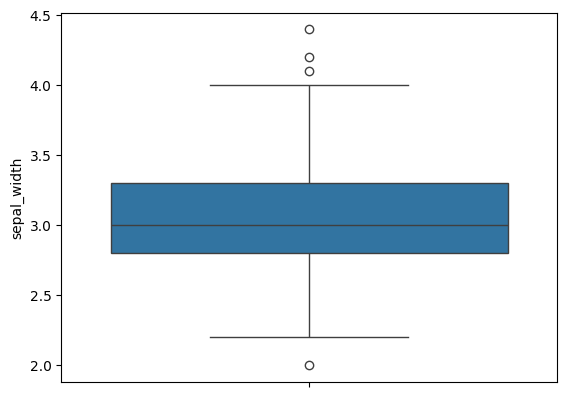

In [14]:
sns.boxplot(data=df['sepal_width'])

<Axes: ylabel='sepal_width'>

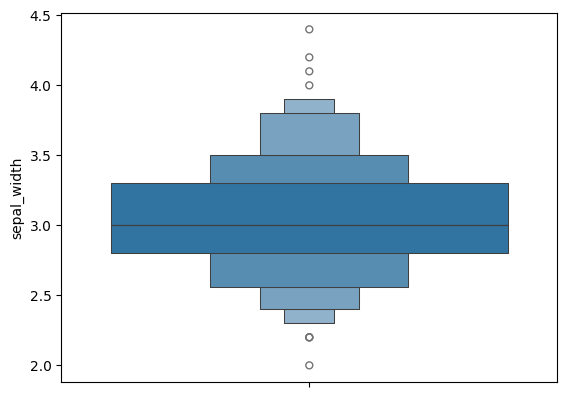

In [15]:
sns.boxenplot(data=df['sepal_width'])

In [16]:
q1=df['sepal_width'].quantile(0.25)
q3=df['sepal_width'].quantile(0.75)
IQR=q3-q1
IQR

0.5

In [17]:
lower_bound=q1-1.5*IQR
upper_bound=q3+1.5*IQR
print(lower_bound,upper_bound)

2.05 4.05


In [18]:
print("Q1:",q1)
print("Q3:",q3)
print("IQR:",IQR)
print("Lower Bound:",lower_bound)
print("Upper_bound:",upper_bound)

Q1: 2.8
Q3: 3.3
IQR: 0.5
Lower Bound: 2.05
Upper_bound: 4.05


In [19]:
dt=df[(df['sepal_width']>=lower_bound) & (df['sepal_width']<=upper_bound)]
dt

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [20]:
dt['sepal_width'].dropna()

,sepal_width
0,3.5
1,3.0
2,3.2
3,3.1
4,3.6
...,...
145,3.0
146,2.5
147,3.0
148,3.4


<Axes: ylabel='sepal_width'>

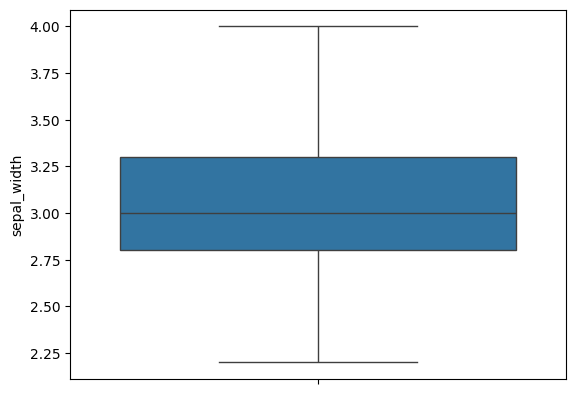

In [21]:
sns.boxplot(data=dt['sepal_width'])

<Axes: ylabel='sepal_width'>

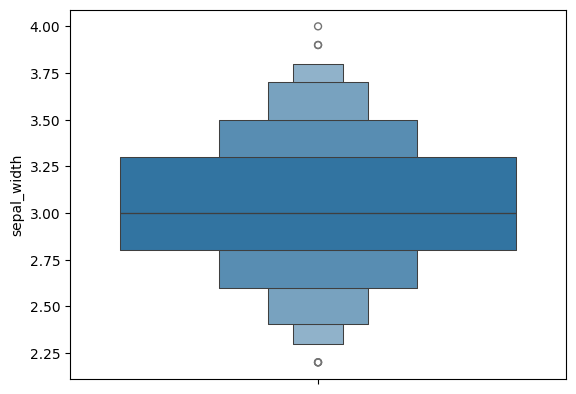

In [22]:
sns.boxenplot(data=dt['sepal_width'])

<Axes: ylabel='sepal_width'>

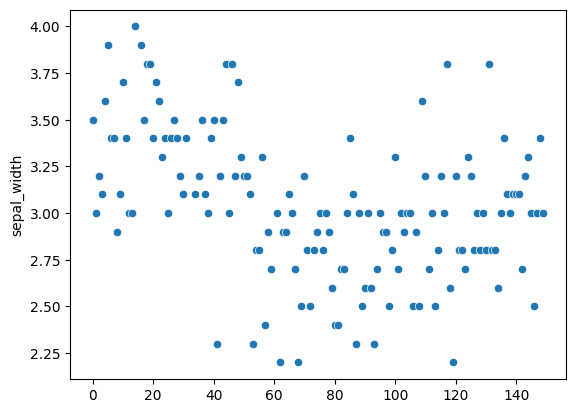

In [23]:
sns.scatterplot(data=dt['sepal_width'])